#### Project wavs into UMAP and cluster using HDBSCAN
- for each bird, for each WAV, grab syllables as spectrograms of equal length
- project spectrograms into UMAP
- cluster UMAP projections


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.utils.hparams import HParams
from avgn.dataset import DataSet
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory

In [4]:
from avgn.signalprocessing.create_spectrogram_dataset import create_syllable_df

In [5]:
from avgn.visualization.projections import scatter_projections
from avgn.visualization.quickplots import draw_projection_plots

### Collect data

In [6]:
hparams = HParams(
    num_mel_bins = 32
    )

In [7]:
DATASET_ID = 'bengalese_finch_sober'
# create a dataset object
dataset = DataSet(DATASET_ID, hparams = hparams)

In [8]:
def flatten_spectrograms(specs):
    return np.reshape(specs, (np.shape(specs)[0], np.prod(np.shape(specs)[1:])))

#### cluster and plot

In [9]:
nex = -1 # for quick viz, how many data points to fit

/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/avgn/visualization/network_graph.py:82: RuntimeWarning: invalid value encountered in true_divide
  transition_matrix = transition_matrix / np.sum(transition_matrix, axis=0)
/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/avgn/visualization/network_graph.py:92: RuntimeWarning: invalid value encountered in greater
  in_list = np.array(np.where(dense_matrix[out_node] > min_connections)[0])


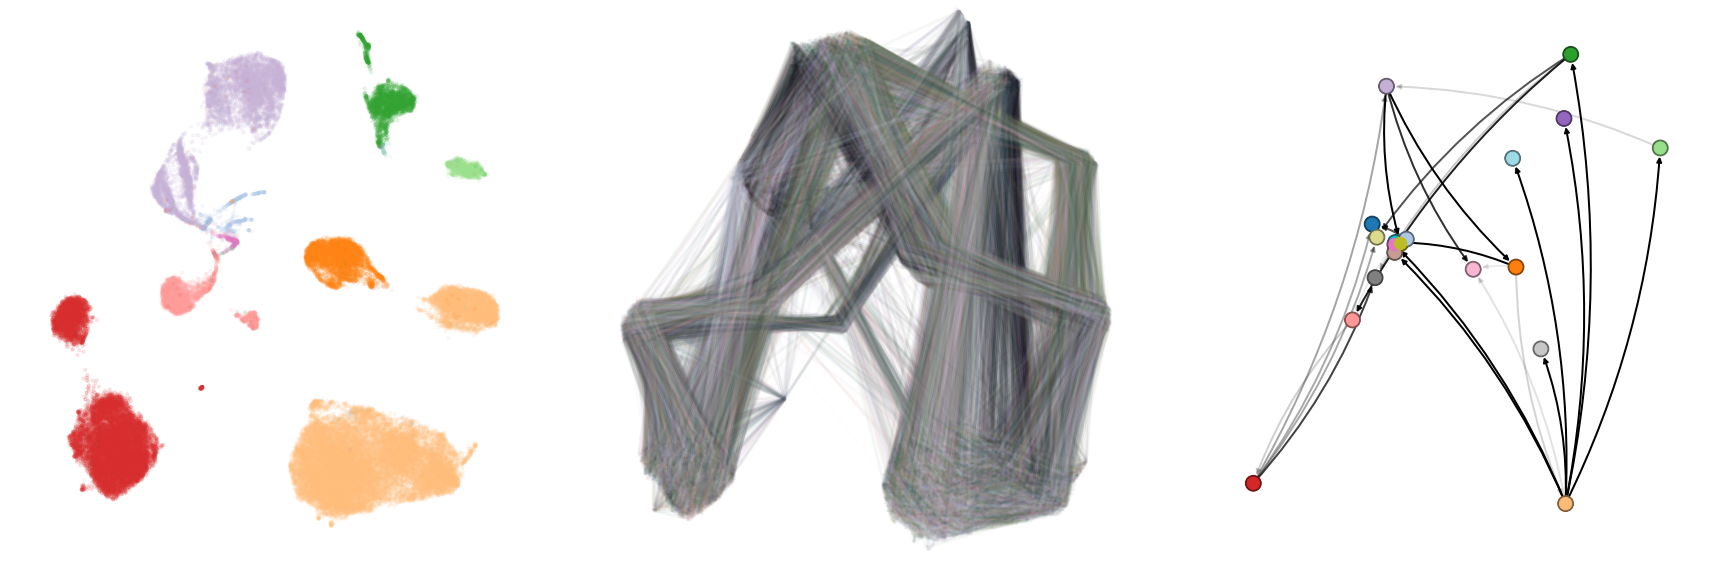

/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/avgn/visualization/network_graph.py:82: RuntimeWarning: invalid value encountered in true_divide
  transition_matrix = transition_matrix / np.sum(transition_matrix, axis=0)
/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/avgn/visualization/network_graph.py:92: RuntimeWarning: invalid value encountered in greater
  in_list = np.array(np.where(dense_matrix[out_node] > min_connections)[0])


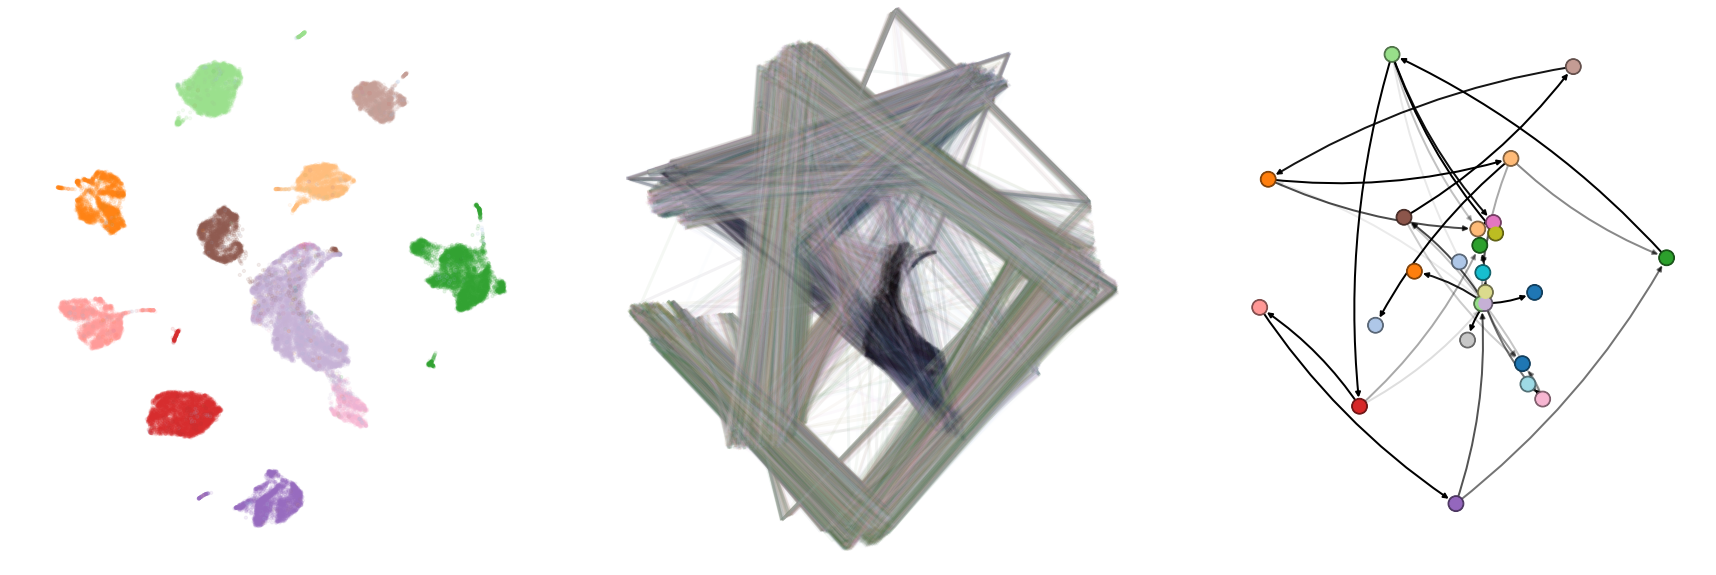

/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/avgn/visualization/network_graph.py:82: RuntimeWarning: invalid value encountered in true_divide
  transition_matrix = transition_matrix / np.sum(transition_matrix, axis=0)
/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/avgn/visualization/network_graph.py:92: RuntimeWarning: invalid value encountered in greater
  in_list = np.array(np.where(dense_matrix[out_node] > min_connections)[0])


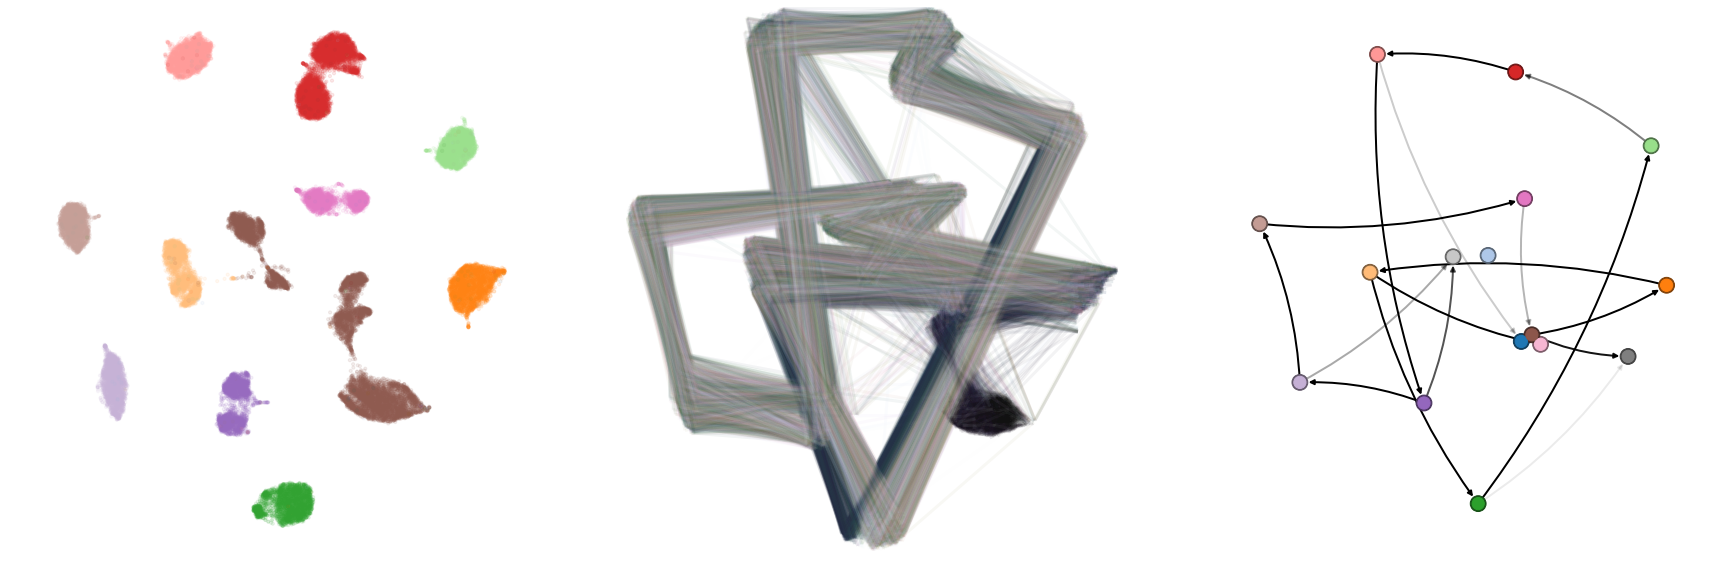

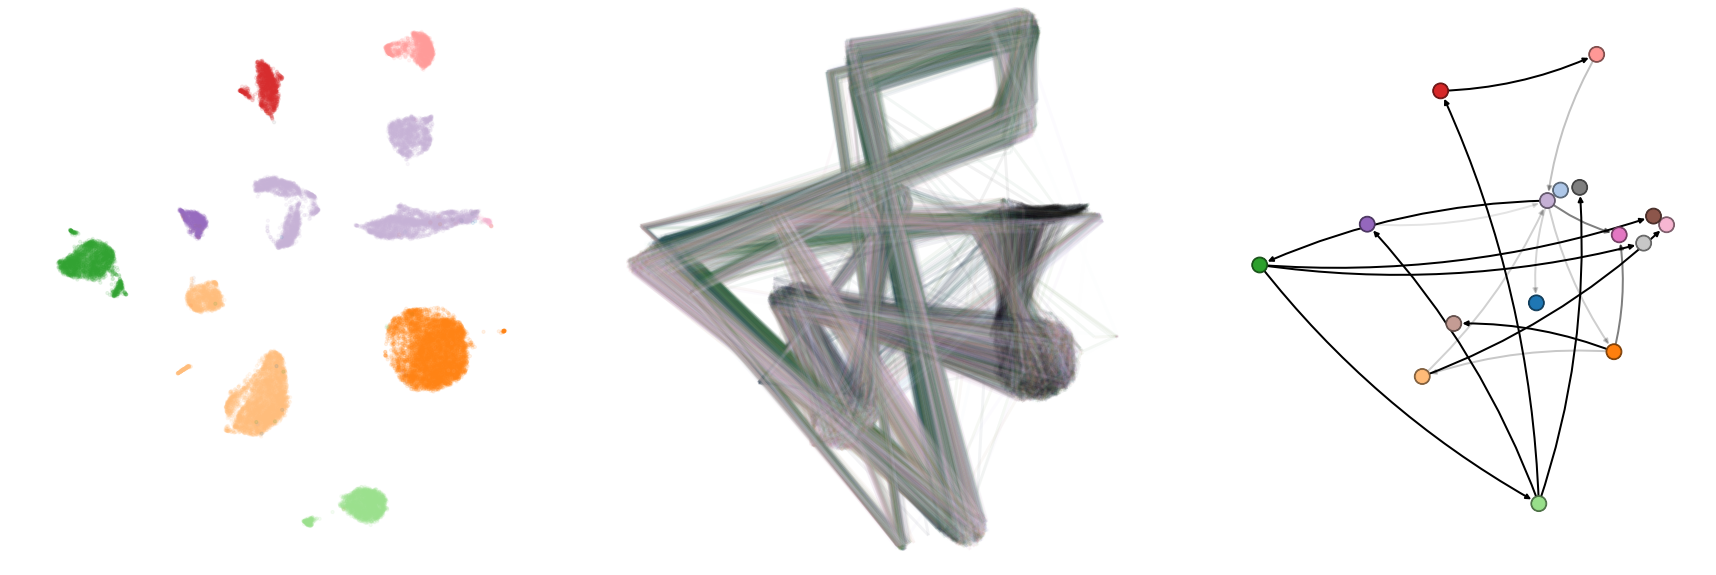

In [10]:
syllable_dfs = {}
for indv in tqdm(dataset._unique_indvs, desc="indvs"):

    # create dataframe
    syllable_dfs[indv] = create_syllable_df(dataset, indv, log_scaling_factor=8)[:nex]
    specs_flattened = flatten_spectrograms(
        np.array(list(syllable_dfs[indv].syllables_spec.values))
    )

    fit = umap.UMAP(min_dist=0.25)
    syllable_dfs[indv]["umap"] = list(fit.fit_transform(specs_flattened))

    # plot data
    draw_projection_plots(syllable_dfs[indv])
    plt.show()